# Clustering case

 <a target="_blank" href="https://colab.research.google.com/github/kirenz/clustering/blob/main/clustering_lab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Case description

Suppose a financial technology (fintech) startup conducted an online survey and obtained data from 1010 individuals. All respondents agreed to receive marketing material from the company.

The data file `responses.csv` contains the data from the questionnaire and consists of 1010 rows (people) and 150 columns (139 integer and 11 categorical). See the data description PDF for a detailed overview of the data.


Let's imagine that after the fintech startup collected the data, they realized that they forgot to include a question regarding wether the respondent is male or female. Since this information is vital to an upcoming marketing campaign which is targeted specifially at women, they decide to use two different clustering methods to figure out wether an individual is male or female based on their reported height and weight. 

A) Data preparation

- Import the data (responses.csv), call the DataFrame `df` and delete all observations with missing infomation ("  `df.dropna(inplace=True)`"). - Next, create a new DataFrame called `df_1` where you only select the variables `Height`, `Weight` and also `Gender`. 
- Visualize the variables `Height` and `Weight` in a scatterplot.

Note that we pretend the variable `Gender` is missing but select it anyway in order to compare the results from the clustering methods with the real gender our observations. However, it is important to note that in real use cases, the cluster analysis is performed if there are no Y-labels (like `Gender`) available. 

B) Standardization

- Create a new DataFrame (call it `X`) with only `Height` and `Weight`
- Standardize the variables (with`StandardScaler`), store them in a new DataFrame  (called `X_std`) 
- Visualize the result in a scatterplot.

C) k-Means

- Use k-Means to determine the two clusters in the dataset `X_std` and visualize the result (label the two clusters as points with different colors and display the cluster centers). 
- Furthermore, save the result as a new variable (`gender_kmeans`) in the original DataFrame `df`.


D) Hierarchical Clustering (Ward)

- Apply hierarchical clustering with Ward's method to the data (`X_std`) 
- Visualize the result (label the two clusters as points with different colors). 
- Furthermore, save the result as a new variable (`gender_ward`) in the original DataFrame `df`.


E) Scatterplots

Next, we use Seaborn to create three different separate scatterplots in which we visualize the variables `Height` and `Weight` together with 

- (1) the variable `Gender` (as points with different colors) from the DataFrame `df`, 
- (2) the variable `gender_kmeans` (as points with different colors) from the DataFrame `df`, 
- (3) the variable `gender_ward` (as points with different colors) from the DataFrame `df`. 

See [Seaborn's documention](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to understand the syntax. 


F) Comparision

- a) What differences do you observe in the results? How do the clustering-results differ?

Now compare the result with the actual gender variable to the clusters of k-Means and hierarchical cluster analysis (note that this is not possible in real world cases since we usually don't have true labels). Answer the following questions:

- Which cluster method performed better if the company has the following goal:
 - b) address as many women as possible.  
 
G) Data finalization

Assume the company decides to use the k-means clustering results. Hence, we create a new DataFrame called `df_3` where we only keep observations which are labeled as female in the `gender_kmeans` result. 

## Solution

### A) Data preparation

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/responses.csv")
df.dropna(inplace=True)

In [3]:
df_1 = df[['Weight','Height','Gender']] 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  674 non-null    float64
 1   Height  674 non-null    float64
 2   Gender  674 non-null    object 
dtypes: float64(2), object(1)
memory usage: 21.1+ KB


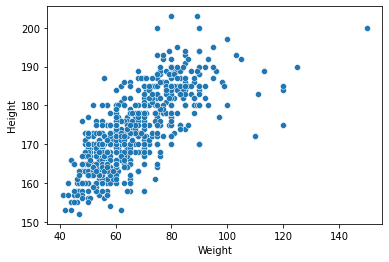

In [4]:
sns.scatterplot(x='Weight', y='Height', data=df_1);

### B) Standardization 

In [5]:
# Standardization of features
X = df[['Weight','Height']] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

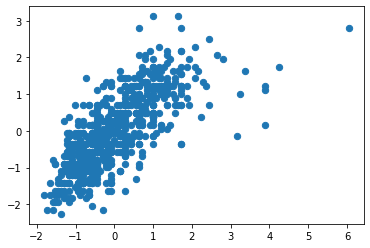

In [6]:
plt.scatter(X_std[:, 0], X_std[:, 1], s=40);

### C) k-Means

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_std)

KMeans(n_clusters=2)

In [8]:
y_kmeans = kmeans.predict(X_std)

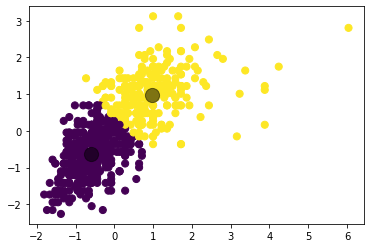

In [9]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [10]:
df['gender_kmeans'] = y_kmeans

### D) Hierarchical Clustering (Ward)

In [11]:
ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
ward.fit(X_std)

AgglomerativeClustering()

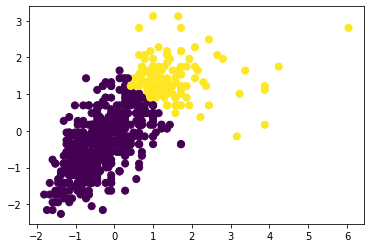

In [12]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=ward.labels_, s=50, cmap='viridis');

In [13]:
gender_ward = ward.fit_predict(X_std)

In [14]:
df['gender_ward'] = gender_ward 

### E), F) Compare results

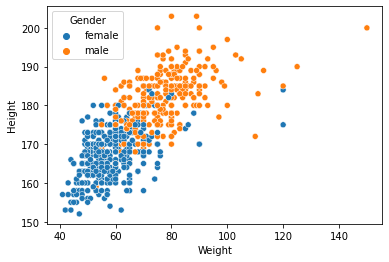

In [15]:
sns.scatterplot(x='Weight', y='Height', hue='Gender', data=df);

In [16]:
df['Gender'].value_counts()

female    402
male      272
Name: Gender, dtype: int64

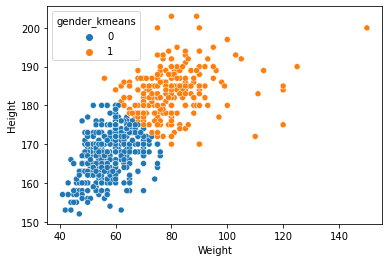

In [17]:
# K means
sns.scatterplot(x='Weight', y='Height', hue='gender_kmeans', data=df);

In [18]:
df['gender_kmeans'].value_counts()

0    413
1    261
Name: gender_kmeans, dtype: int64

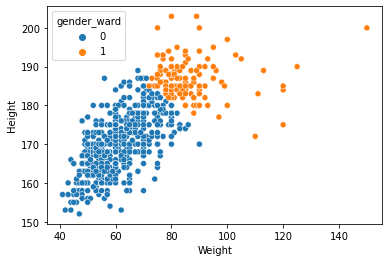

In [19]:
#Ward
sns.scatterplot(x='Weight', y='Height', hue='gender_ward', data=df);

In [20]:
df['gender_ward'].value_counts()

0    548
1    126
Name: gender_ward, dtype: int64

### G) Finalize data

In [21]:
df_3 = df[df.gender_kmeans == 1]
df_3.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,gender_kmeans,gender_ward
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,77.0,1.0,male,right handed,secondary school,no,city,block of flats,1,1
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow,1,1
18,5.0,3.0,5.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,...,78.0,2.0,male,right handed,secondary school,no,city,house/bungalow,1,0
19,5.0,4.0,3.0,3.0,2.0,4.0,2.0,2.0,4.0,5.0,...,90.0,1.0,male,left handed,secondary school,no,city,house/bungalow,1,1
20,5.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,5.0,5.0,...,77.0,1.0,male,right handed,secondary school,no,city,block of flats,1,1
